In [156]:
#Dependencies
import numpy as np
import pandas as pd
#Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
#Additional Queries
%matplotlib inline
from matplotlib import style
style.use('bmh')
import matplotlib.pyplot as plt
#Add Trendline
import seaborn as sns
from scipy import stats

In [157]:
engine = create_engine("sqlite:///hawaii.sqlite")

#reflect an existing database into a new model
Base = automap_base()
#reflect the tables
Base.prepare(engine, reflect=True)

#Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [158]:
#Create session from Python to DB
session = Session(engine)

#Get header names, tobs means temperatures in degrees F
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fe5e19bdbd0>,
 'id': 1,
 'date': '2010-01-01',
 'tobs': 65.0,
 'station': 'USC00519397',
 'prcp': 0.08}

# Deliverable 1: Determine the Summary Statistics for June

In [159]:
#1- Import the sqlalchemy extract function
from sqlalchemy import extract

#2- Write a query that filters the Measurement table to retrieve the temperatures for the month of June
temp_results_june = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()
print(temp_results_june)





[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [160]:
#3- Convert the June temperatures to a list
temps_june = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()
print(temps_june)

[(78.0,), (76.0,), (78.0,), (76.0,), (77.0,), (78.0,), (77.0,), (78.0,), (78.0,), (79.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (77.0,), (77.0,), (82.0,), (78.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (73.0,), (70.0,), (76.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (75.0,), (76.0,), (76.0,), (77.0,), (78.0,), (76.0,), (77.0,), (75.0,), (77.0,), (76.0,), (76.0,), (75.0,), (77.0,), (77.0,), (76.0,), (78.0,), (77.0,), (76.0,), (77.0,), (76.0,), (76.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (77.0,), (76.0,), (75.0,), (76.0,), (76.0,), (77.0,), (76.0,), (73.0,), (73.0,), (75.0,), (77.0,), (76.0,), (77.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (79.0,), (77.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (73.0,), (76.0,), (77.0,), (75.0,), (76.0,), (74.0,), 

In [161]:
#4- Create a DataFrame from the list of temperatures for the month of June. 
temps_june_df = pd.DataFrame(temps_june)
print(temps_june_df)

         0
0     78.0
1     76.0
2     78.0
3     76.0
4     77.0
...    ...
1695  79.0
1696  74.0
1697  74.0
1698  76.0
1699  75.0

[1700 rows x 1 columns]


In [162]:
#5- Calculate and print out the summary statistics for the June temperature DataFrame.
df_june.describe()



,tobs
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


# Deliverable 2: Determine the Summary Statistics for December

In [175]:
from sqlalchemy import extract
#6- Write a query that filters the Measurement table to retrieve the temperatures for the month of December
temp_results_dec = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()
print(temp_results_dec)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [176]:
#7- Convert the December temperatures to a list.
temps_dec = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()
print(temps_dec)

[(76.0,), (74.0,), (74.0,), (64.0,), (64.0,), (67.0,), (77.0,), (66.0,), (69.0,), (68.0,), (68.0,), (71.0,), (74.0,), (67.0,), (66.0,), (69.0,), (71.0,), (70.0,), (70.0,), (74.0,), (74.0,), (71.0,), (75.0,), (75.0,), (72.0,), (69.0,), (68.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (73.0,), (71.0,), (73.0,), (73.0,), (77.0,), (72.0,), (71.0,), (73.0,), (70.0,), (73.0,), (69.0,), (74.0,), (72.0,), (71.0,), (72.0,), (72.0,), (70.0,), (73.0,), (73.0,), (72.0,), (73.0,), (73.0,), (72.0,), (63.0,), (65.0,), (71.0,), (76.0,), (70.0,), (76.0,), (69.0,), (69.0,), (69.0,), (74.0,), (76.0,), (74.0,), (73.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (74.0,), (74.0,), (71.0,), (73.0,), (72.0,), (64.0,), (66.0,), (73.0,), (72.0,), (65.0,), (64.0,), (69.0,), (68.0,), (77.0,), (71.0,), (71.0,), (69.0,), (68.0,), (68.0,), (69.0,), (70.0,), (72.0,), (76.0,), (75.0,), (69.0,), (71.0,), (71.0,), (71.0,), (68.0,), (65.0,), (70.0,), (69.0,), (69.0,), (71.0,), (67.0,), (73.0,), (74.0,), (73.0,), 

In [177]:
#8- Create a DataFrame from the list of temperatures for the month of December 
temps_dec_df = pd.DataFrame(temps_dec)
print(temps_dec_df)

         0
0     76.0
1     74.0
2     74.0
3     64.0
4     64.0
...    ...
1512  71.0
1513  71.0
1514  69.0
1515  65.0
1516  65.0

[1517 rows x 1 columns]


In [178]:
#9- Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df_dec.describe()

,tobs
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [179]:
#Create additional queries for Precipitation
prcp_june = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()
print(prcp_june)


[('2010-06-01', 0.0), ('2010-06-02', 0.01), ('2010-06-03', 0.0), ('2010-06-04', 0.0), ('2010-06-05', 0.0), ('2010-06-06', 0.0), ('2010-06-07', 0.0), ('2010-06-08', 0.0), ('2010-06-09', 0.0), ('2010-06-10', 0.0), ('2010-06-11', 0.0), ('2010-06-12', 0.0), ('2010-06-13', 0.0), ('2010-06-14', 0.0), ('2010-06-15', 0.0), ('2010-06-16', 0.0), ('2010-06-17', 0.0), ('2010-06-18', 0.0), ('2010-06-19', 0.0), ('2010-06-20', 0.0), ('2010-06-21', 0.0), ('2010-06-22', 0.0), ('2010-06-23', 0.0), ('2010-06-24', 0.0), ('2010-06-25', 0.0), ('2010-06-26', 0.02), ('2010-06-27', 0.0), ('2010-06-28', 0.0), ('2010-06-29', 0.0), ('2010-06-30', 0.0), ('2011-06-01', 0.07), ('2011-06-02', 0.0), ('2011-06-03', 0.56), ('2011-06-04', 0.89), ('2011-06-05', 0.0), ('2011-06-06', 0.0), ('2011-06-07', 0.0), ('2011-06-08', 0.03), ('2011-06-09', 0.01), ('2011-06-10', 0.0), ('2011-06-11', 0.0), ('2011-06-12', 0.0), ('2011-06-13', 0.0), ('2011-06-14', 0.0), ('2011-06-15', 0.0), ('2011-06-17', 0.0), ('2011-06-18', 0.0), ('201

In [180]:
df_june_prcp.describe()


,prcp
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [181]:
prcp_dec = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()
print(prcp_dec)

[('2010-12-01', 0.04), ('2010-12-03', 0.0), ('2010-12-04', 0.0), ('2010-12-06', 0.0), ('2010-12-07', 0.0), ('2010-12-08', 0.0), ('2010-12-09', 0.0), ('2010-12-10', 1.58), ('2010-12-11', 0.77), ('2010-12-12', 0.0), ('2010-12-13', 0.0), ('2010-12-14', 0.0), ('2010-12-15', 0.0), ('2010-12-16', 0.0), ('2010-12-17', 0.0), ('2010-12-18', 0.0), ('2010-12-19', 1.4), ('2010-12-23', 0.0), ('2010-12-24', 0.0), ('2010-12-26', None), ('2010-12-27', 0.13), ('2010-12-28', 0.55), ('2010-12-29', 0.06), ('2010-12-30', 0.01), ('2010-12-31', 0.0), ('2011-12-01', 0.03), ('2011-12-02', 0.08), ('2011-12-03', 0.0), ('2011-12-04', 0.0), ('2011-12-05', 0.0), ('2011-12-06', 0.0), ('2011-12-07', 0.0), ('2011-12-08', 0.0), ('2011-12-09', 0.13), ('2011-12-10', 0.07), ('2011-12-11', 0.07), ('2011-12-12', 0.08), ('2011-12-13', 0.4), ('2011-12-14', 0.7), ('2011-12-15', 0.0), ('2011-12-16', 0.01), ('2011-12-17', 0.07), ('2011-12-18', 0.02), ('2011-12-19', 0.15), ('2011-12-20', 0.02), ('2011-12-21', 0.18), ('2011-12-22'

In [182]:
df_dec_prcp.describe()

,prcp
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


(0.0, 400.0)

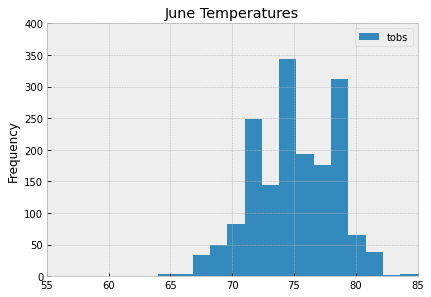

In [183]:
#Plot June Temperature Data

june_temp_df = pd.DataFrame(temps_june, columns=['tobs'])
june_temp_df.plot.hist(bins=15)
plt.tight_layout()
plt.title('June Temperatures')
plt.xlim([55, 85])
plt.ylim([0,400])


(0.0, 400.0)

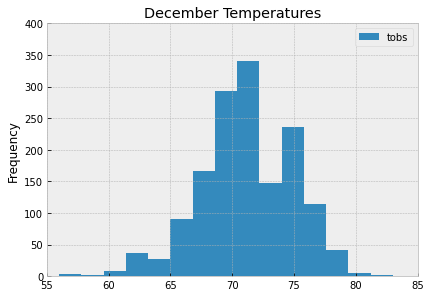

In [184]:
#Plot the December Temperature Data
dec_temp_df = pd.DataFrame(temps_dec, columns=['tobs'])
dec_temp_df.plot.hist(bins=15)
plt.tight_layout()
plt.title('December Temperatures')
plt.xlim([55, 85])
plt.ylim([0,400])

In [196]:
#Additional query for June for precip by temp
june_temp_prcp = session.query(Measurement.tobs, Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()
june_temp_prcp_df = pd.DataFrame(june_temp_prcp, columns=['tobs','prcp'])
june_temp_prcp_df.describe()


,tobs,prcp
count,1700.000000,1574.000000
mean,74.944118,0.136360
std,3.257417,0.335731
min,64.000000,0.000000
25%,73.000000,0.000000
50%,75.000000,0.020000
75%,77.000000,0.120000
max,85.000000,4.430000


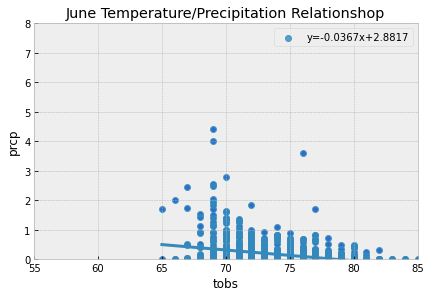

In [190]:
# Graph June temp-prcp data
june_temp_prcp_df = pd.DataFrame(june_temp_prcp, columns=['tobs','prcp'])
#Remov Nans to plot on the scatterplot
june_temp_prcp_df = june_temp_prcp_df.dropna()
june_temp_prcp_df.plot.scatter('tobs', 'prcp')
plt.tight_layout()
plt.title('June Temperature/Precipitation Relationshop')
plt.xlim([55, 85])
plt.ylim([0,8])

#Adding trendline
slope, intercept, r_value, p_value, std_err = stats.linregress(june_temp_prcp_df['tobs'],june_temp_prcp_df['prcp'])
sns.regplot(x='tobs', y='prcp', data=june_temp_prcp_df, ci=None, label="y={0:.4f}x+{1:.4f}".format(slope,intercept)).legend(loc="best")

In [198]:
#Additional query for December for precip by temp
Dec_temp_prcp = session.query(Measurement.tobs,Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()
Dec_temp_prcp_df = pd.DataFrame(Dec_temp_prcp, columns=['tobs','prcp'])
Dec_temp_prcp_df.describe()


,tobs,prcp
count,1517.000000,1405.000000
mean,71.041529,0.216819
std,3.745920,0.541399
min,56.000000,0.000000
25%,69.000000,0.000000
50%,71.000000,0.030000
75%,74.000000,0.150000
max,83.000000,6.420000


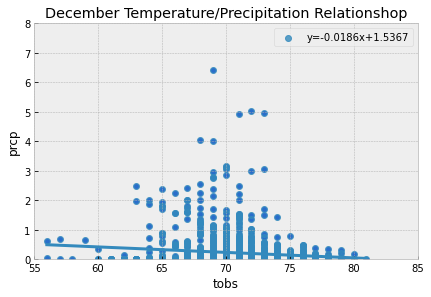

In [199]:
#Graph December temp-prcp data
Dec_temp_prcp_df = pd.DataFrame(Dec_temp_prcp, columns=['tobs','prcp'])
#Remov Nans to plot on the scatterplot
Dec_temp_prcp_df = Dec_temp_prcp_df.dropna()
Dec_temp_prcp_df.plot.scatter('tobs', 'prcp')
plt.tight_layout()
plt.title('December Temperature/Precipitation Relationshop')
plt.xlim([55, 85])
plt.ylim([0,8])

#Adding trendline
slope, intercept, r_value, p_value, std_err = stats.linregress(Dec_temp_prcp_df['tobs'],Dec_temp_prcp_df['prcp'])
sns.regplot(x='tobs', y='prcp', data=Dec_temp_prcp_df, ci=None, label="y={0:.4f}x+{1:.4f}".format(slope,intercept)).legend(loc="best")